# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Escreva seu nome aqui</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)


---

# Seção: Fundamentos


---

**Questão 1**: (2.5 pts) Matrizes e SVD



(a) (0.5 pts) Vamos criar uma matriz $A_{100 \times 4}$ de zeros:

In [2]:
# Criando uma matriz de zeros de tamanho 100x4.
A = np.zeros((100, 4))
A.shape

(100, 4)

Agora preencha a matriz A com as seguintes especificações:

- A coluna $1$ tem uma lista de inteiros de $1$ a $100$. Pode usar `list` e `range` padrão do Python, ou pode usar `np.arange` ou `np.linspace` (que provavelmente é o jeito mais fácil).
- A coluna $2$ tem apenas o valor $1$ em todas as posições
- A coluna $3$ tem os inteiros de $101$ a $200$, assim como foi feito para a coluna $1$
- A coluna $4$ tem números aleatórios com distribuição gaussiana padrão (ou seja, média zero e desvio padrão $1$). Use a função `np.random.normal`.

Nota: lembre-se que em Matemática os índices começam em $1$, mas em Python (e em C, C++, JavaScript, Java, Rust, Go, etc.) os índices começam em zero, ok? Portanto $A_{5,3}$ em Matemática é `A[4,2]` em Python.


---

**Resposta**

In [3]:
A[:, 0] = np.arange(100)
A[:, 1] = np.ones(100)
A[:, 2] = np.linspace(101, 200, 100)
A[:, 3] = np.random.normal(0, 1, 100)
A.round(2)

array([[ 0.00e+00,  1.00e+00,  1.01e+02,  5.00e-01],
       [ 1.00e+00,  1.00e+00,  1.02e+02, -1.40e-01],
       [ 2.00e+00,  1.00e+00,  1.03e+02,  6.50e-01],
       [ 3.00e+00,  1.00e+00,  1.04e+02,  1.52e+00],
       [ 4.00e+00,  1.00e+00,  1.05e+02, -2.30e-01],
       [ 5.00e+00,  1.00e+00,  1.06e+02, -2.30e-01],
       [ 6.00e+00,  1.00e+00,  1.07e+02,  1.58e+00],
       [ 7.00e+00,  1.00e+00,  1.08e+02,  7.70e-01],
       [ 8.00e+00,  1.00e+00,  1.09e+02, -4.70e-01],
       [ 9.00e+00,  1.00e+00,  1.10e+02,  5.40e-01],
       [ 1.00e+01,  1.00e+00,  1.11e+02, -4.60e-01],
       [ 1.10e+01,  1.00e+00,  1.12e+02, -4.70e-01],
       [ 1.20e+01,  1.00e+00,  1.13e+02,  2.40e-01],
       [ 1.30e+01,  1.00e+00,  1.14e+02, -1.91e+00],
       [ 1.40e+01,  1.00e+00,  1.15e+02, -1.72e+00],
       [ 1.50e+01,  1.00e+00,  1.16e+02, -5.60e-01],
       [ 1.60e+01,  1.00e+00,  1.17e+02, -1.01e+00],
       [ 1.70e+01,  1.00e+00,  1.18e+02,  3.10e-01],
       [ 1.80e+01,  1.00e+00,  1.19e+02, -9.10

---

A célula abaixo calcula a decomposição em valores singulares (SVD - *Singular Value Decomposition*) de $A$:

In [4]:
U, s, Vt = np.linalg.svd(A)

In [5]:
U.shape, s.shape, Vt.shape

((100, 100), (4,), (4, 4))

Responda as perguntas a seguir:

(b) (0.5 pts) Mostre que $U$ e $V$ são ortonormais, ou unitárias. Dica: em Python, o operador `@` multiplica matrizes. Dica: para escrever uma matriz usando poucos dígitos decimais, use o método `.round()` de matrizes - por exemplo, para escrever $M$ com dois dígitos, use `M.round(2)`.


---

**Resposta**

In [6]:
(U @ U.T).round(2)

array([[ 1., -0.,  0., ..., -0.,  0.,  0.],
       [-0.,  1., -0., ..., -0., -0., -0.],
       [ 0., -0.,  1., ..., -0.,  0.,  0.],
       ...,
       [-0., -0., -0., ...,  1.,  0.,  0.],
       [ 0., -0.,  0., ...,  0.,  1.,  0.],
       [ 0., -0.,  0., ...,  0.,  0.,  1.]])

In [7]:
(Vt @ Vt.T).round(2)

array([[ 1., -0., -0., -0.],
       [-0.,  1., -0.,  0.],
       [-0., -0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

---

(c) (0.5 pts) O array `s` contém apenas uma lista de números ao invés de ser uma matriz $100 \times 4$. Construa uma matriz $S$ que siga o padrão da SVD, ou seja, $1$ bloco diagonal com os valores de `s`, e um bloco de zeros. Dica: use as funções `np.diag`, `np.zeros` e `np.vstack`


---

**Resposta**

In [8]:
S = np.vstack((np.diag(s), np.zeros((96, 4))))
S.round(2)

array([[1626.24,    0.  ,    0.  ,    0.  ],
       [   0.  ,  179.3 ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    9.03,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ],
       [  

---

(d) (0.5 pts) Em `s` temos que o menor elemento é efetivamente zero, veja:

In [9]:
s.round(2)

array([1626.24,  179.3 ,    9.03,    0.  ])

*Baseado na construção de $A$*, explique porque o menor elemento de `s` é zero.


---

**Resposta**

O menor elemento de `s` é zero pois há colunas colineares na matriz $A$, já que $A_{x,1}+100\cdot A_{x,2} = A_{x,3}$

---

(e) (0.5 pts) Efetue o produto $\boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^{T}$ e verifique que bate com $A$, a menos de precisão numérica. Dica: use a função `np.allclose` para verificar que dois arrays tem valores muito próximos.


---

**Resposta**

In [10]:
np.allclose(A, U @ S @ Vt)

True

---

**Questão 2** (2.0 pts) O algoritmo de minimização por descida do gradiente funciona da seguinte forma:

- Comece por um ponto de partida qualquer
- Loop:
    - Atualize a estimativa do minimo, adicionando um pequeno multiplo (taxa de aprendizagem) do negativo do gradiente.
    - Se a atualização foi negligível, pare o loop

Eis uma implementação:

In [11]:
def gradient_descent(f, g, x0, eta=0.01, tol=1e-6, max_iter=1000):
    """Algoritmo de otimização do gradiente descendente.

    Args:
        f (callable): Função objetivo.
        g (callable): Gradiente da função objetivo.
        x0 (np.ndarray): Ponto inicial.
        alpha (float): Taxa de aprendizado.
        tol (float): Tolerância para o critério de parada.
        max_iter (int): Número máximo de iterações.
    
    Returns:
        np.ndarray: Ponto ótimo.
    """
    x = x0
    for i in range(max_iter):
        x_new = x - eta * g(x)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    if i == max_iter - 1:
        print("Aviso: número máximo de iterações atingido!")
    return x_new

Nesta implementação você passa *funções* `f(x)` e `g(x)` que computam o valor da função a ser otimizada, e o seu gradiente. Por exemplo, vamos minimizar a função $f(x) = x^2 -4 x + 1$. Seu gradiente é apenas uma derivada simples, pois essa função tem apenas uma variável, e vale $g(x) = 2 x - 4$.

In [12]:
def f(x):
    return x**2 - 4*x + 1

def g(x):
    return 2*x - 4

In [13]:
x_plot = np.linspace(-3, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

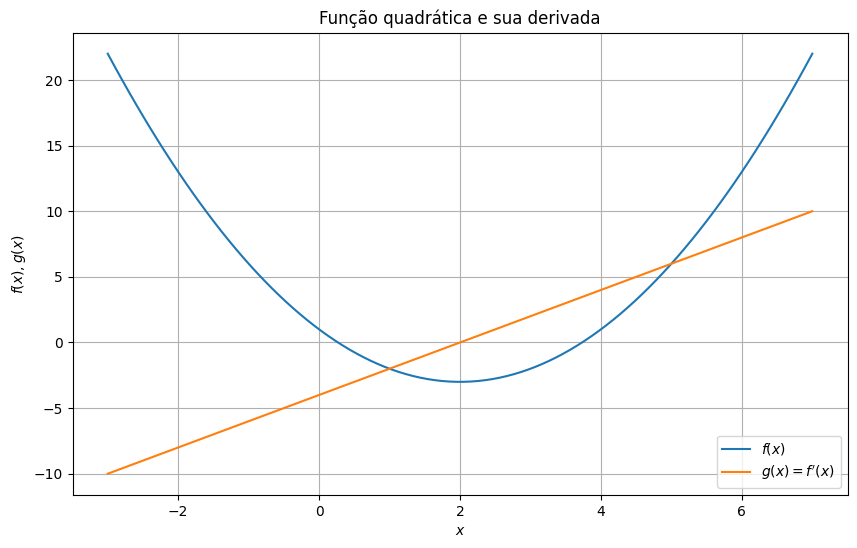

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label=r'$f(x)$')
plt.plot(x_plot, g_plot, label=r'$g(x) = f^{\prime}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x), g(x)$')
plt.title('Função quadrática e sua derivada')
plt.legend()
plt.grid()
plt.show()

(a) (0.5 pts) Pelo método analítico, qual o ponto de mínimo de $f(x)$?


---

**Resposta**

No ponto em que $f'(x) = 0$, ou seja na coordenada (2, -3) 

---

(b) (0.5 pts) Usando a função `gradient_descent` acima podemos achar o mínimo numericamente, veja:

In [15]:
x_min = gradient_descent(f, g, -2, eta=0.1, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

O ponto ótimo é 2.00.


Vamos achar o mínimo numericamente, usando a função `gradient_descent` acima com `eta = 1e-4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [16]:
x_min = gradient_descent(f, g, -2, eta=1e-4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é -1.27.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Não foi possível encontrar o valor correto do mínimo, pois o valor da constante `eta` é pequeno demais, fazendo com que a aproximação do ponto ótimo ocorra muito devagar, não ocorrendo antes do limite de iterações ser alcançado. Para resolver isso seria necessário aumentar o valor da constante `eta` ou aumentar o limite de iterações.

---

(c) (0.5 pts) Agora vamos tentar de novo mas com `eta = 1e4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [17]:
x_min = gradient_descent(f, g, -2, eta=1e4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

Aviso: número máximo de iterações atingido!
O ponto ótimo é nan.


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Diferente do caso anterior, o valor de `eta` utilizado é grande demais, impedindo que ocorra a convergência no ponto ótimo (inclusive, o valor ultrapaçou o valor máximo de um interger). Para resolver isso seria necessário reduzir o valor de `eta`.

---

(d) (0.5 pts) Vamos explorar agora outra função: $f(x) = x^4 - (52 / 3) x^3 + 108 x^2 - 288 x + 290$. A derivada de $f(x)$ é $g(x) = 4 x^3 - 52 x^2 + 216 x - 288$. Veja os gráficos abaixo.

In [18]:
def f(x):
    return x**4 - (52 / 3) * x**3 + 108 * x**2 - 288 * x + 290


def g(x):
    return 4 * x**3 - 52 * x**2 + 216 * x - 288

In [19]:
x_plot = np.linspace(2, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

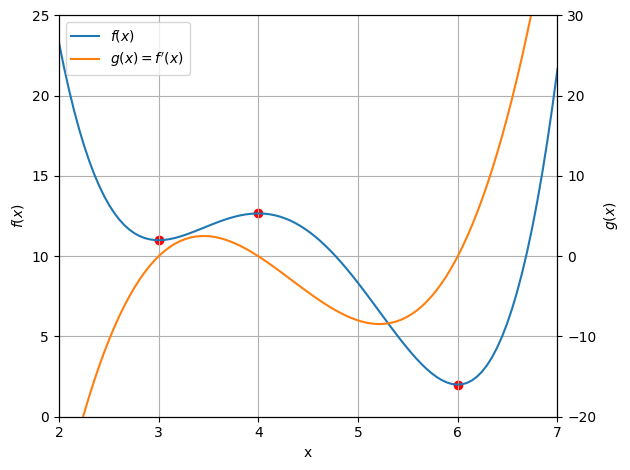

In [20]:
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
lines1 = ax1.plot(
    x_plot,
    f_plot,
    color=color1,
    label=r'$f(x)$',
)
ax1.scatter(
    [3, 4, 6],
    [f(3), f(4), f(6)],
    color='red',
)
ax1.set_xlabel('x')
ax1.set_xlim(2, 7)
ax1.set_ylim(0, 25)
ax1.set_ylabel(r'$f(x)$')

ax2 = ax1.twinx()
color2 = 'tab:orange'
lines2 = ax2.plot(
    x_plot,
    g_plot,
    color=color2,
    label=r'$g(x) = f^{\prime}(x)$',
)
ax2.set_ylim(-20, 30)
ax2.set_ylabel(r'$g(x)$')

lines = lines1 + lines2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()

O que aconteceu com o `gradient_descent` se ao buscamos achar o mínimo a partir de $x_{\text{inicial}} = 2$ paramos em $x = 3$ ao invés do ponto ótimo $x = 6$? Explique com suas palavras, e monte um exemplo de código (i.e. chame a função `gradient_descent` com os parâmetros necessários) para demonstrar este fenômeno.


---

**Resposta**

Se a colocarmos o $x_{inicial}$ dentro do intervalo $]\infty^-,4]$ a função convergirá para o minimo local $x=3$, pois ele é o ponto mínimo mais próximo.

In [36]:
gradient_descent(f, g, 2.9, eta=1e-3, tol=1e-6, max_iter=1000)

2.999917979717876

---

# Seção: Técnicas

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Questão 3** (2.0 pts) Clustering

(a) (0.5 pts) A função abaixo constroi um dataset simulado com 3 clusters:

In [22]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    cluster_std=0.5,
    random_state=0,
)

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Execute uma clusterização `KMeans` e visualize o resultado, explique se o resultado é razoável.


---

**Resposta**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

---

(b) (0.5 pts) Calcule o *silhouette score* do seu clustering (`sklearn.metrics.silhouette_score`)


---

**Resposta**

In [ ]:
silhouette_score(X, kmeans.labels_)

---

(c) (0.5 pts) Agora vamos multiplicar a primeira coluna de $X$ por $10000$

In [ ]:
X_bad = X.copy()
X_bad[:, 0] = X_bad[:, 0] * 10000
plt.scatter(X_bad[:, 0], X_bad[:, 1])
plt.show()

Execute uma clusterização `KMeans` neste novo dataset e explique se o resultado é uma clusterização razoável.


---

**Resposta**

In [ ]:
kmeans_bad = KMeans(n_clusters=3, random_state=0).fit(X_bad)
plt.scatter(X_bad[:, 0], X_bad[:, 1], c=kmeans_bad.labels_)
plt.show()


Como X está numa ordem de grandeza muito maior que Y ele possui muito mais relevancia para o algoritmo do que Y, fazendo com que o algoritmo perca a precisão no eixo X

---

(d) (0.5 pts) Calcule o *silhouette score* do seu novo clustering e compare com o score do item (b)


---

**Resposta**

In [ ]:
silhouette_score(X_bad, kmeans_bad.labels_)

Os valores dos `silhoette` estão próximos, mas o `silhoette` do item c é pior porque a sua clusterização também está pior.

---

**Questão 4** (3.5 pts) Regressão

(a) (0.5 pts) Explique porque ao construir a equação normal temos que adicionar uma coluna de $1\text{s}$ na matriz $X$.


---

**Resposta**

pois a equação normal é $y = \theta_0\cdot 1 + \theta_1\cdot x_1 + ... \theta_n\cdot x_n$, então para ser possível obter essa euquação a partir de uma multiplicação de matrizes é necessário colocar uma coluna de `1s` no ínicio para que ela seja multiplicada pelo $\theta_0$.

---

(b) (3.0 pts) Construa um projeto de regressão sobre os dados do dataset "Liver disorders" do OpenML (https://www.openml.org/search?type=data&status=active&id=8). Para sua conveniência eu já salvei os dados em um arquivo *pickle*:

In [29]:
import pickle

with open('liver.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.keys()

In [ ]:
print(data.DESCR)

In [ ]:
data.frame

Itens a serem avaliados:

- Análise exploratória (1.0 pt)
- Feature engineering (apenas se realmente necessário) e construção do modelo (1.0 pt)
- Análise de desempenho (split treino-teste, métricas de desempenho, etc. Não me importa se o erro vai ser baixo, quero ver se a técnica é correta.) (1.0 pt)


---

**Resposta**

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plt.subplot(2, 3, 1)
plt.hist(data['data']['mcv'])
plt.title('mcv')

plt.subplot(2,3, 2)
plt.hist(data['data']['alkphos'])
plt.title('alkphos')

plt.subplot(2,3, 3)
plt.hist(data['data']['sgpt'])
plt.title('sgpt')

plt.subplot(2,3, 4)
plt.hist(data['data']['sgot'])
plt.title('sgot')

plt.subplot(2,3, 5)
plt.hist(data['data']['gammagt'])
plt.title('gammagt')
fig.show()


In [34]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [35]:
data = fetch_openml(name='liver-disorders', version=1)

In [36]:
X = data.data
y = data.target

In [37]:
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
rmse